In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from typing import List
from colour import Color

In [ ]:
# print the average d over N
data_d_N: pd.DataFrame = pd.read_csv('scaling_d_N_new.csv')
for N in [10, 20, 30, 50, 100]:
    group = data_d_N[data_d_N['N'] == N].groupby(['d'])
    loss_group = group.mean()['loss']
    X = [d for d in loss_group.index.to_list()]
    Z = loss_group.to_list()
    #minZ = min(Z)
    #Z = [z-minZ for z in Z]
    plt.plot(X, Z, label=f'N={N}')
    plt.xlabel('d')
    plt.ylabel('KL divergence') #(rescaled)')
plt.title('Scaling law on the residual dimension (d) and the number of tokens (N)')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

In [ ]:
# print the average h over d
data_d_h: pd.DataFrame = pd.read_csv('scaling_d_h_new.csv')
for d in [2, 4, 6, 8, 10]:
    group = data_d_h[data_d_h['d'] == d].groupby(['h'])
    loss_group = group.mean()['loss']
    X = [h for h in loss_group.index.to_list()]
    Z = loss_group.to_list()
    plt.plot(X, Z, label=f'd={d}')
plt.xlabel('Ratio h/d')
plt.ylabel('KL divergence')
plt.title('Scaling law on the residual dimension (d) and the hidden dimension (h)')
plt.legend()
plt.show()

In [ ]:
# print the average nb_layers over d
data_d_layer: pd.DataFrame = pd.read_csv('scaling_d_layer_new.csv')
list_d: List[int] = data_d_layer.groupby(['d']).mean()['loss'].index.to_list()
for d in list_d:
    group = data_d_layer[data_d_layer['d'] == d].groupby(['nb_layers'])
    loss_group = group.mean()['loss']
    X = loss_group.index.to_list()
    Z = loss_group.to_list()
    plt.plot(X, Z, label=f'd={d}')
plt.xlabel('Number of layers')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('KL divergence')
plt.title('Scaling law on the residual dimension (d) and the number of layers')
plt.legend()
plt.show()

In [ ]:
# print the average head over d
data_d_head: pd.DataFrame = pd.read_csv('scaling_d_head_new.csv')
list_d = data_d_head.groupby(['d']).mean()['loss'].index.to_list()
for d in list_d:
    group = data_d_head[data_d_head['d'] == d].groupby(['nb_head'])
    loss_group = group.mean()['loss']
    X = loss_group.index.to_list()
    Z = loss_group.to_list()
    plt.plot(X, Z, label=f'd={d}')
plt.xlabel('Number of heads per self-attention')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('KL divergence')
plt.title('Scaling law on the residual dimension (d) \n and the number of heads, with 100 tokens')
plt.legend()
plt.show()

In [ ]:
# print the average hidden dimension over the number of parallel heads
data_h_para: pd.DataFrame = pd.read_csv('scaling_h_para_new.csv')
list_h: List[int] = data_h_para.groupby(['h']).mean()['loss'].index.to_list()
for h in list_h:
    group = data_h_para[data_h_para['h'] == h].groupby(['para_head'])
    loss_group = group.mean()['loss']
    X = loss_group.index.to_list()
    Z = loss_group.to_list()
    plt.plot(X, Z, label=f'h={h}')
plt.xlabel('Number of parallel self-attention')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('KL divergence')
plt.title('Scaling law on the hidden dimension (h) \n and the number of parallel self-attention')
plt.legend()
plt.show()

In [ ]:
# print the effect of the entropy
data_lamb: pd.DataFrame = pd.read_csv('scaling_csv_v3/Scaling_entropy.csv')
group = data_lamb.groupby(['lamb'])
loss = group.mean()['loss']
unif_loss = group.mean()['unif_loss'].to_list()
best_loss = group.mean()['best_loss'].to_list()
ent = loss.index.to_list()
loss = loss.to_list()
plt.plot(ent, loss, label='Transformer')
plt.plot(ent, unif_loss, label='Uniform', color='red')
plt.plot(ent, best_loss, label='Low rank', color='green')
plt.xlabel('Entropy of the distribution')
plt.ylabel('KL divergence')
plt.legend()
plt.title('Scaling law on the entropy of the distribution')
plt.show()

In [ ]:
# print the effect of the entropy
data_power: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_power_law.csv')
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
for i, alpha in enumerate([0.5, 0.9, 0.99]):
    group = data_power[data_power['alpha_1'] == alpha].groupby(['alpha_2'])
    loss = group.mean()['loss']
    unif_loss = group.mean()['unif_loss'].to_list()
    best_loss = group.mean()['best_loss'].to_list()
    ent = loss.index.to_list()
    loss = loss.to_list()
    ax[i].plot(ent, loss, label=f'Transformer')
    ax[i].plot(ent, unif_loss, label='Uniform', color='red')
    ax[i].plot(ent, best_loss, label='Low rank', color='green')
    ax[i].set_title(f'alpha={alpha}')
    ax[i].set_xlabel('Third token power law parameter')
ax[i].legend()
ax[0].set_ylabel('KL divergence')
fig.suptitle('Scaling laws on the parameters for power laws \n of parameter alpha for the first and second token')
plt.show()

In [ ]:
# print the effect of the entropy
data_bigram: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_bigram.csv')
colors = list(Color("orange").range_to(Color("green"),5))
for i, (d, c) in enumerate(zip([1, 3, 5, 8, 10], colors)):
    group = data_bigram[data_bigram['d'] == d].groupby(['alpha_2'])
    loss = group.mean()['loss']
    unif_loss = group.mean()['unif_loss'].to_list()
    best_loss = group.mean()['best_loss'].to_list()
    ent = loss.index.to_list()
    loss = loss.to_list()
    plt.plot(ent, best_loss, label=f'Low rank d={d}', color=c.hex)
data_power: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_power_law.csv')
group = data_power[data_power['alpha_1'] == 0.9].groupby(['alpha_2'])
loss = group.mean()['loss'].to_list()
plt.plot(ent, loss, label=f'Transformer', color='blue')
plt.plot(ent, unif_loss, label='Uniform', color='red')
plt.xlabel('Third token power law parameter')
plt.ylabel('KL divergence')
plt.legend()
plt.title('Scaling laws of the third token\'s power law\'s parameter \n and optimal bigram scalings')
plt.show()

In [ ]:
# print the average h over layers
data_h_layer: pd.DataFrame = pd.read_csv('scaling_h_layer_new.csv')
for nb_layers in [1, 2, 4, 5]:
    group = data_h_layer[data_h_layer['nb_layers'] == nb_layers].groupby(['h'])
    loss_group = group.mean()['loss']
    X = [h for h in loss_group.index.to_list()]
    Z = loss_group.to_list()
    plt.plot(X, Z, label=f'l={nb_layers}')
plt.xlabel('Width h of the MLPs')
plt.ylabel('KL divergence')
plt.title('Scaling law on the number of layer (l) and the width of the MLPs (h)')
plt.legend()
plt.show()

In [ ]:
# print the average parallel heads
data_para: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_h_layer_para_2.csv')
for h in [0, 100, 1000]:
    for layer in [1, 2]:
        group = data_para[data_para['h'] == h][data_para['nb_layers'] == layer].groupby(['para_head'])
        loss_group = group.mean()['loss']
        ent = [h for h in loss_group.index.to_list()]
        loss = loss_group.to_list()
        plt.plot(ent, loss, label=f'h={h}, nb_layer={layer}')
unif_loss = data_para.groupby(['para_head']).mean()['unif_loss'].to_list()
best_loss = [data_para['best_loss'][0] for _ in unif_loss]
#plt.plot(ent, unif_loss, label='Uniform', color='red')
#plt.plot(ent, best_loss, label='Low rank', color='green')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of parallel heads')
plt.ylabel('KL divergence (min at 1.0)')
plt.title('Scaling law on the number of parallel heads, with and without MLPs')
plt.legend()
plt.show()

In [ ]:
# print the average parallel heads
data_para: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_h_layer_para_4.csv')
for h in [0, 1000]:
    group = data_para[data_para['h'] == h].groupby(['nb_layers'])
    loss_group = group.mean()['loss']
    ent = loss_group.index.to_list()
    loss = loss_group.to_list()
    plt.scatter(ent, loss, label=f'h={h}, para=50')
unif_loss = data_para.groupby(['para_head']).mean()['unif_loss'].to_list()
best_loss = [data_para['best_loss'][0] for _ in unif_loss]
#plt.plot(ent, unif_loss, label='Uniform', color='red')
#plt.plot(ent, best_loss, label='Low rank', color='green')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of parallel heads')
plt.ylabel('KL divergence')
plt.title('Scaling law on the number of parallel heads, with and without MLPs')
plt.legend()
plt.show()

In [2]:
# print the average d over N
data_d: pd.DataFrame = pd.read_csv('scaling_d_new.csv')
for N in [100]:
    group = data_d[data_d['N'] == N].groupby(['d'])
    loss_group = group.mean()['loss']
    X = [d for d in loss_group.index.to_list()]
    Z = loss_group.to_list()
    #minZ = min(Z)
    #Z = [z-minZ for z in Z]
    plt.plot(X, Z, label=f'N={N}')
    plt.xlabel('d')
    plt.ylabel('KL divergence') #(rescaled)')
plt.title('Scaling law on the residual dimension (d) and the number of tokens (N)')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'scaling_d_new.csv'

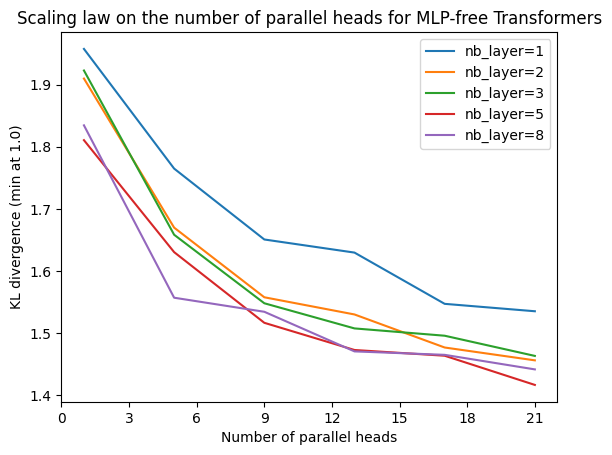

In [11]:
# print the average parallel heads
data_free: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_mlp_free.csv')
for layer in [1, 2, 3, 5, 8]:
    group = data_free[data_free['nb_layers'] == layer].groupby(['para_head'])
    loss_group = group.mean()['loss']
    ent = loss_group.index.to_list()
    loss = loss_group.to_list()
    plt.plot(ent, loss, label=f'nb_layer={layer}')
#unif_loss = data_free.groupby(['para_head']).mean()['unif_loss'].to_list()
#best_loss = [data_free['best_loss'][0] for _ in unif_loss]
#plt.plot(ent, unif_loss, label='Uniform', color='red')
#plt.plot(ent, best_loss, label='Low rank', color='green')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of parallel heads')
plt.ylabel('KL divergence (min at 1.0)')
plt.title('Scaling law on the number of parallel heads for MLP-free Transformers')
plt.legend()
plt.show()

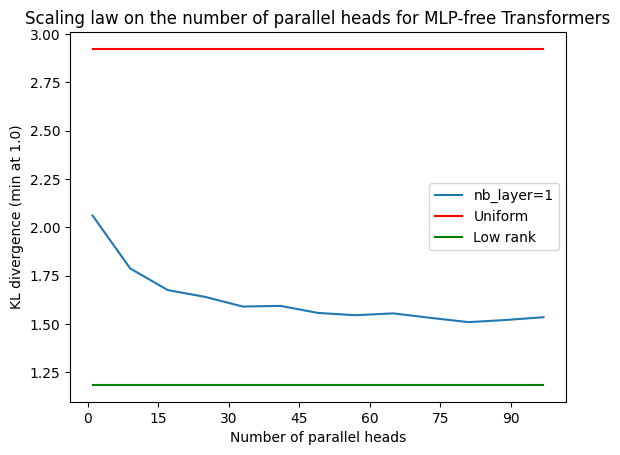

In [10]:
# print the average parallel heads
data_free: pd.DataFrame = pd.read_csv('scaling_csv_v3/scaling_mlp_free_3.csv')
for layer in [1]:
    group = data_free[data_free['nb_layers'] == layer].groupby(['para_head'])
    loss_group = group.mean()['loss']
    ent = loss_group.index.to_list()
    loss = loss_group.to_list()
    plt.plot(ent, loss, label=f'nb_layer={layer}')
unif_loss = data_free.groupby(['para_head']).mean()['unif_loss'].to_list()
best_loss = [data_free['best_loss'][0] for _ in unif_loss]
plt.plot(ent, unif_loss, label='Uniform', color='red')
plt.plot(ent, best_loss, label='Low rank', color='green')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Number of parallel heads')
plt.ylabel('KL divergence (min at 1.0)')
plt.title('Scaling law on the number of parallel heads for MLP-free Transformers')
plt.legend()
plt.show()